In [18]:
### 1번 블럭

# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 한글 폰트 설정
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드 함수
def load_and_prepare_data():
    """세 모델의 평가 데이터 로드"""
    base_path = '/Users/foxrainswap/Desktop/캡스톤_코드/1112/'
    
    # 데이터 로드
    lstm_df = pd.read_csv(base_path + 'LSTM_결과/lstm_evaluation.csv')
    sarima_df = pd.read_csv(base_path + 'SARIMA_결과/sarima_evaluation.csv')
    prophet_df = pd.read_csv(base_path + 'Prophet_결과/prophet_evaluation.csv')
    
    # 모델 구분 컬럼 추가
    lstm_df['model'] = 'LSTM'
    sarima_df['model'] = 'SARIMA'
    prophet_df['model'] = 'Prophet'
    
    return pd.concat([lstm_df, sarima_df, prophet_df])

# 데이터 로드
all_models_df = load_and_prepare_data()

=== 전체 모델 성능 비교 ===

MAE 점수:
model    요일구분
LSTM     일요일     3.992473
         토요일     3.962114
         평일      3.400503
Prophet  일요일     0.000000
         토요일     0.000000
         평일      0.000000
SARIMA   일요일     2.896006
         토요일     3.071487
         평일      3.328202
Name: MAE, dtype: float64

RMSE 점수:
model    요일구분
LSTM     일요일     5.233149
         토요일     4.994875
         평일      4.671840
Prophet  일요일     0.000000
         토요일     0.000000
         평일      0.000000
SARIMA   일요일     4.171141
         토요일     4.281657
         평일      5.191205
Name: RMSE, dtype: float64

SMAPE 점수:
model    요일구분
LSTM     일요일     85.925638
         토요일     80.097172
         평일      67.785950
Prophet  일요일      0.000000
         토요일      0.000000
         평일       0.000000
SARIMA   일요일     48.460879
         토요일     44.182210
         평일      46.924467
Name: SMAPE, dtype: float64


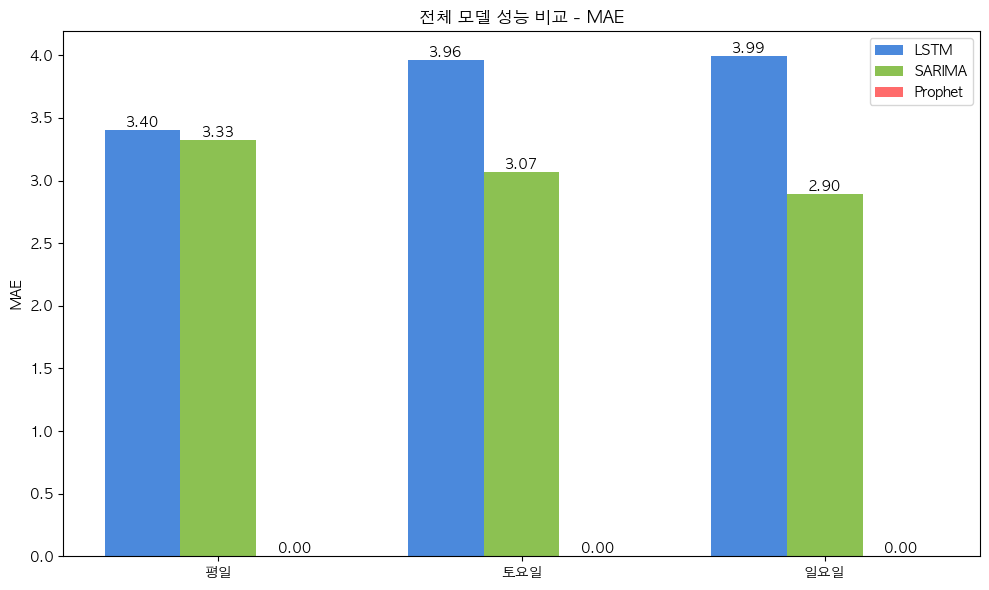

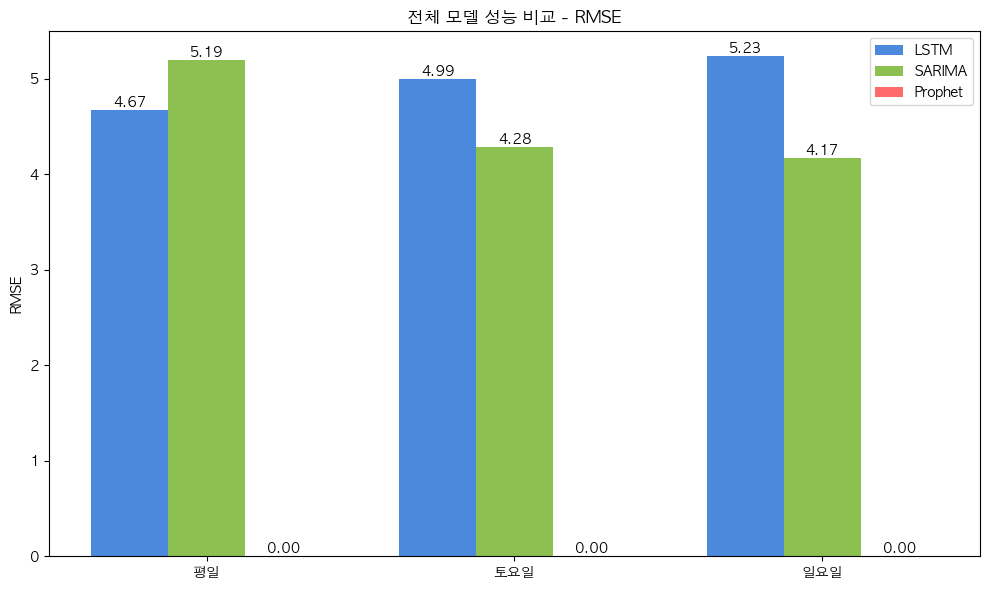

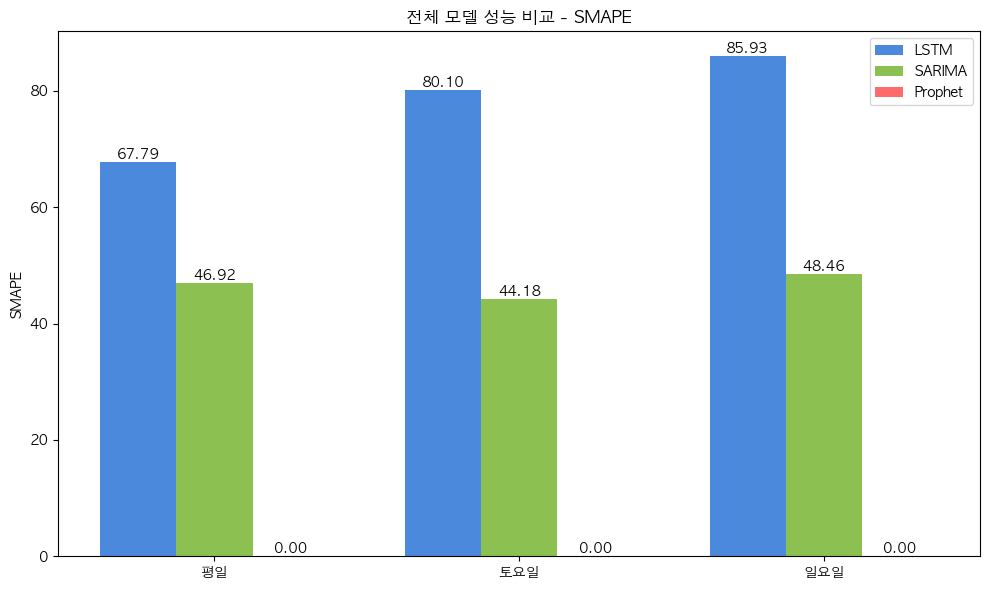

In [19]:
# 2번 블록: 전체 모델 성능 비교
overall_scores = all_models_df[all_models_df['구분'] == '전체'].groupby(['model', '요일구분'])[['MAE', 'RMSE', 'SMAPE']].mean()

print("=== 전체 모델 성능 비교 ===")
print("\nMAE 점수:")
print(overall_scores['MAE'])
print("\nRMSE 점수:")
print(overall_scores['RMSE'])
print("\nSMAPE 점수:")
print(overall_scores['SMAPE'])

# 각 지표별 시각화
metrics = ['MAE', 'RMSE', 'SMAPE']
colors = ['#4B89DC', '#8CC152', '#FF6B6B']  # 파랑, 연두, 빨강

for metric in metrics:
    plt.figure(figsize=(10, 6))
    
    # 막대 그래프 생성
    x = np.arange(3)  # 평일/토요일/일요일
    width = 0.25      # 막대 너비
    
    # 각 모델별로 다른 색상의 막대 그래프 생성
    models = ['LSTM', 'SARIMA', 'Prophet']
    
    for idx, (model, color) in enumerate(zip(models, colors)):
        data = [overall_scores[metric].loc[model, day_type] for day_type in ['평일', '토요일', '일요일']]
        bars = plt.bar(x + width*idx, data, width, label=model, color=color)
        
        # 막대 위에 수치 표시
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}',
                    ha='center', va='bottom')
    
    plt.title(f'전체 모델 성능 비교 - {metric}')
    plt.ylabel(metric)
    plt.xticks(x + width, ['평일', '토요일', '일요일'])
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()


=== 요일 구분별 모델 성능 ===

MAE 점수:
model    요일구분
LSTM     일요일     3.992473
         토요일     3.962114
         평일      3.400503
Prophet  일요일     0.000000
         토요일     0.000000
         평일      0.000000
SARIMA   일요일     2.896006
         토요일     3.071487
         평일      3.328202
Name: MAE, dtype: float64


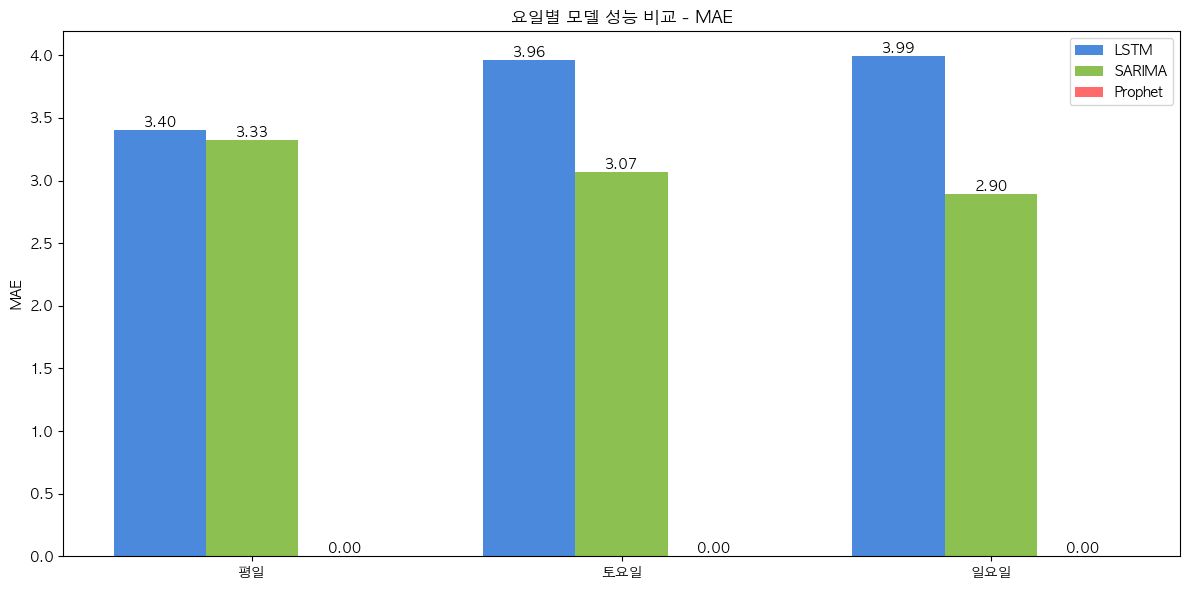


RMSE 점수:
model    요일구분
LSTM     일요일     5.233149
         토요일     4.994875
         평일      4.671840
Prophet  일요일     0.000000
         토요일     0.000000
         평일      0.000000
SARIMA   일요일     4.171141
         토요일     4.281657
         평일      5.191205
Name: RMSE, dtype: float64


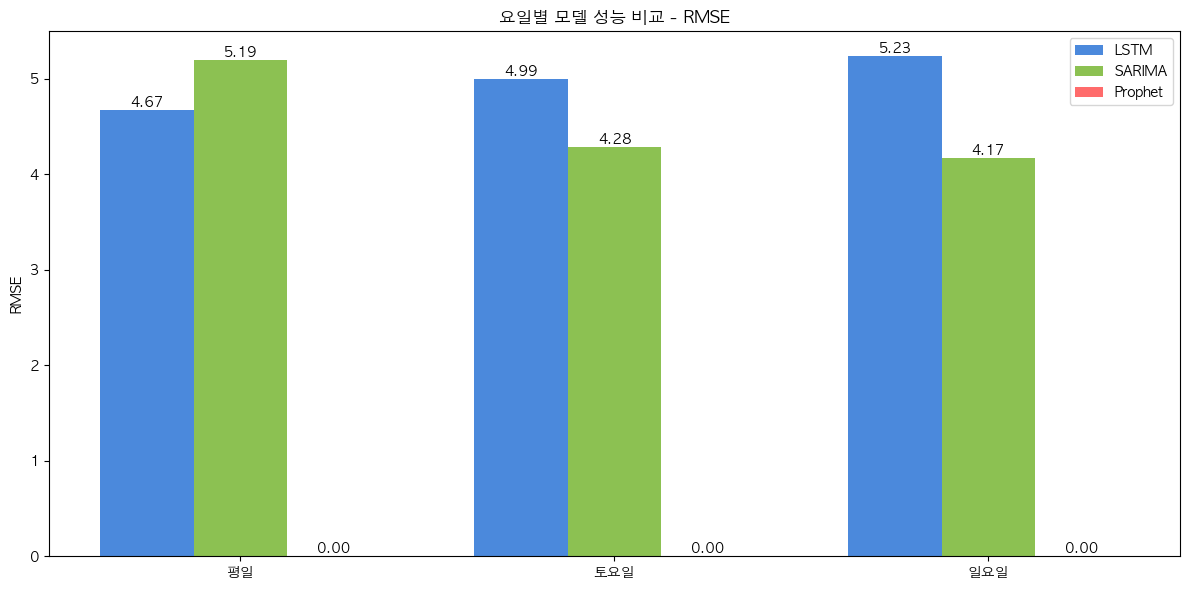


SMAPE 점수:
model    요일구분
LSTM     일요일     85.925638
         토요일     80.097172
         평일      67.785950
Prophet  일요일      0.000000
         토요일      0.000000
         평일       0.000000
SARIMA   일요일     48.460879
         토요일     44.182210
         평일      46.924467
Name: SMAPE, dtype: float64


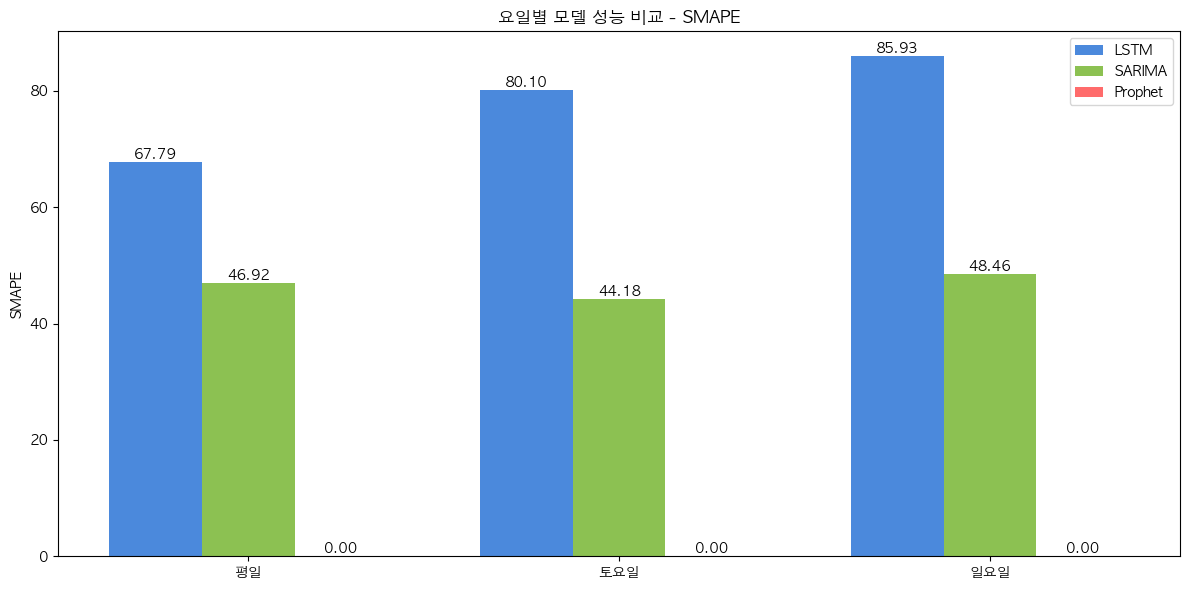

In [20]:
# 3번 블록: 전체 시간대 분석
day_type_scores = all_models_df[all_models_df['구분'] == '전체'].groupby(['model', '요일구분'])[metrics].mean()

print("\n=== 요일 구분별 모델 성능 ===")
for metric in metrics:
    print(f"\n{metric} 점수:")
    print(day_type_scores[metric])
    
    plt.figure(figsize=(12, 6))
    
    # 모델별 위치 계산
    x = np.arange(3)  # 평일/토요일/일요일 3개
    width = 0.25      # 막대 너비
    
    # 각 모델별로 다른 색상의 막대 그래프 생성
    models = ['LSTM', 'SARIMA', 'Prophet']
    colors = ['#4B89DC', '#8CC152', '#FF6B6B']  # 파랑, 연두, 빨강
    
    for idx, (model, color) in enumerate(zip(models, colors)):
        data = [day_type_scores[metric].loc[model, day_type] 
                for day_type in ['평일', '토요일', '일요일']]
        bars = plt.bar(x + width*idx, data, width, label=model, color=color)
        
        # 막대 위에 수치 표시
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}',
                    ha='center', va='bottom')
    
    plt.title(f'요일별 모델 성능 비교 - {metric}')
    plt.ylabel(metric)
    plt.xticks(x + width, ['평일', '토요일', '일요일'])
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()


=== 첨두 시간대 모델 성능 ===

MAE 점수:
model    요일구분
LSTM     일요일     3.753237
         토요일     3.856390
         평일      2.815284
Prophet  일요일     0.000000
         토요일     0.000000
         평일      0.000000
SARIMA   일요일     3.071343
         토요일     3.208002
         평일      4.358418
Name: MAE, dtype: float64


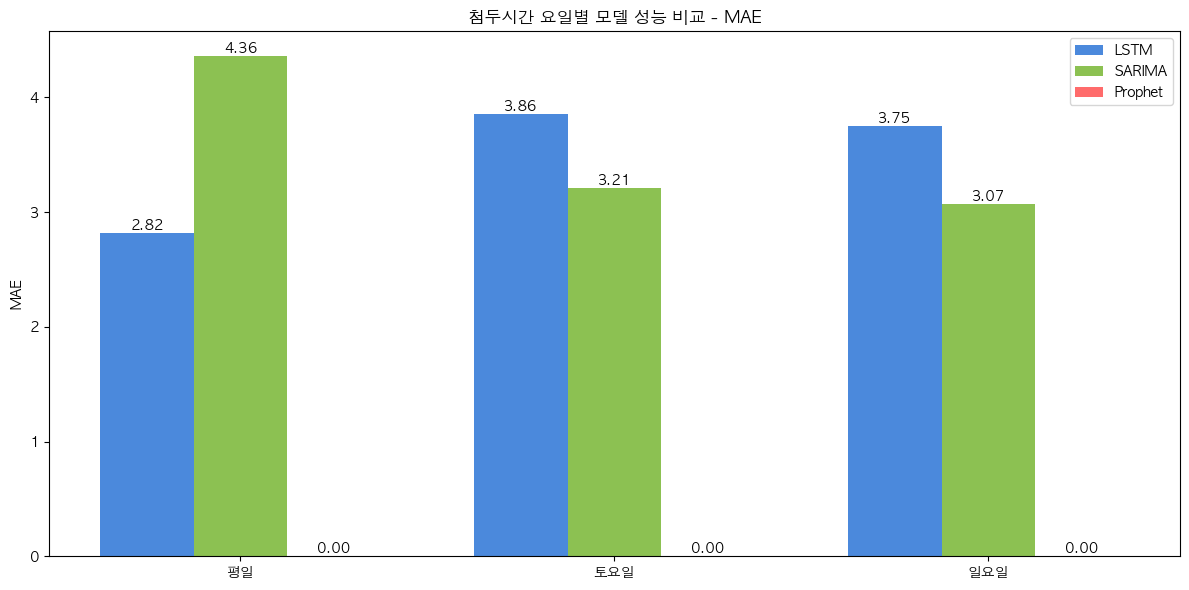


RMSE 점수:
model    요일구분
LSTM     일요일     4.689396
         토요일     4.689968
         평일      3.787568
Prophet  일요일     0.000000
         토요일     0.000000
         평일      0.000000
SARIMA   일요일     4.115372
         토요일     4.178215
         평일      6.446115
Name: RMSE, dtype: float64


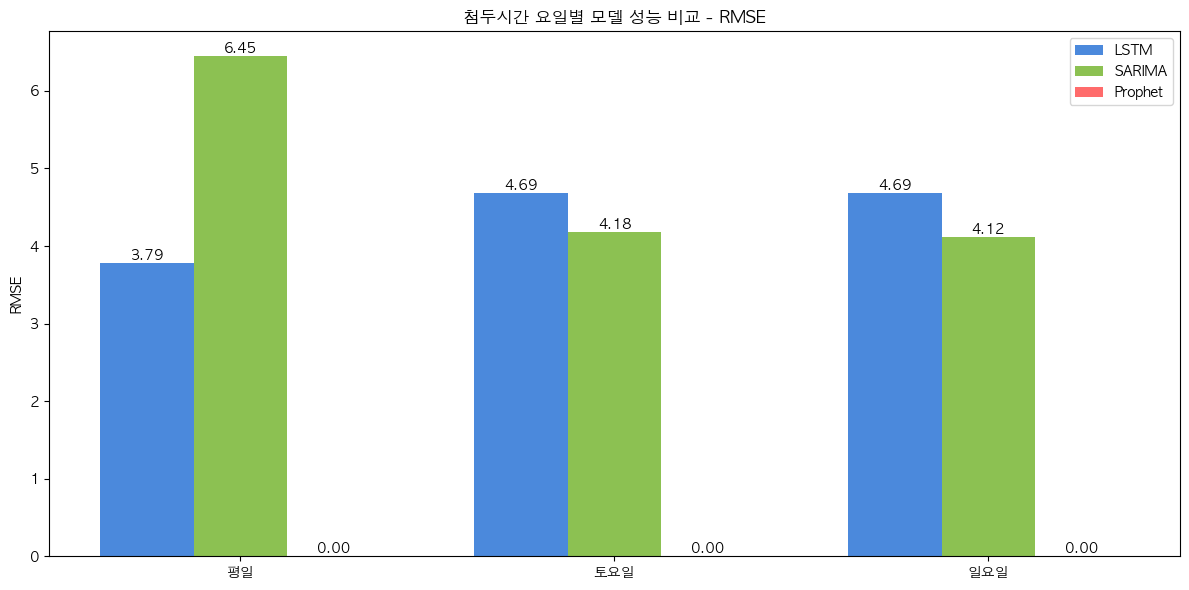


SMAPE 점수:
model    요일구분
LSTM     일요일     97.393530
         토요일     92.091558
         평일      79.424642
Prophet  일요일      0.000000
         토요일      0.000000
         평일       0.000000
SARIMA   일요일     58.575077
         토요일     49.730229
         평일      45.837578
Name: SMAPE, dtype: float64


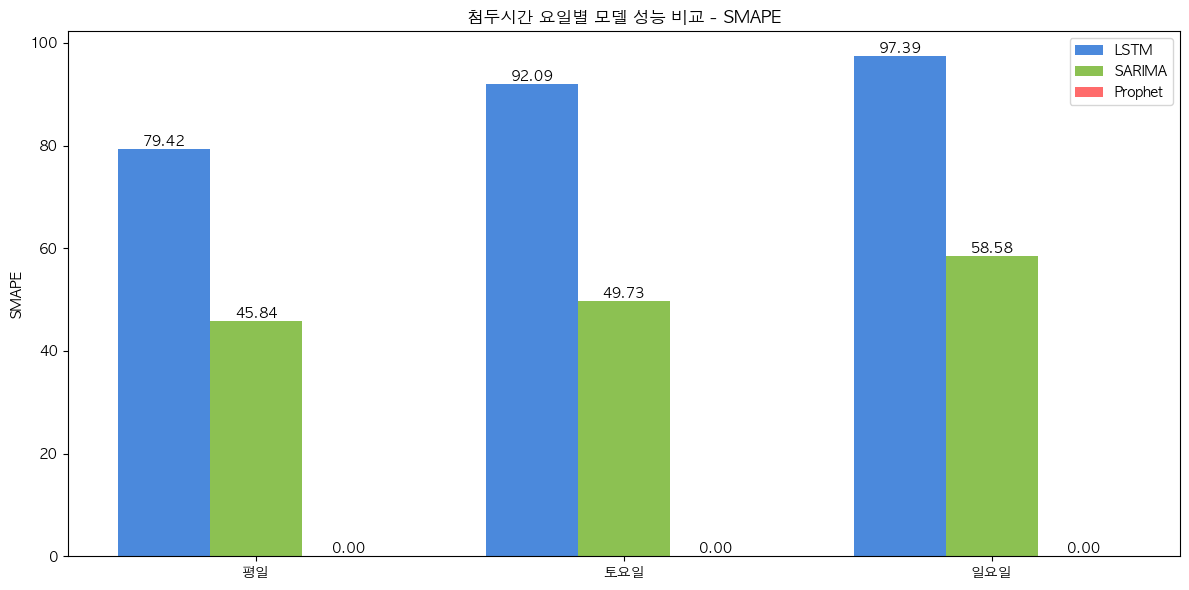

In [21]:
# 4번 블록: 첨두 시간대 분석
peak_scores = all_models_df[all_models_df['구분'] == '첨두'].groupby(['model', '요일구분'])[metrics].mean()

print("\n=== 첨두 시간대 모델 성능 ===")
for metric in metrics:
    print(f"\n{metric} 점수:")
    print(peak_scores[metric])
    
    plt.figure(figsize=(12, 6))
    
    # 모델별 위치 계산
    x = np.arange(3)  # 평일/토요일/일요일 3개
    width = 0.25      # 막대 너비
    
    # 각 모델별로 다른 색상의 막대 그래프 생성
    models = ['LSTM', 'SARIMA', 'Prophet']
    colors = ['#4B89DC', '#8CC152', '#FF6B6B']  # 파랑, 연두, 빨강
    
    for idx, (model, color) in enumerate(zip(models, colors)):
        data = [peak_scores[metric].loc[model, day_type] 
                for day_type in ['평일', '토요일', '일요일']]
        bars = plt.bar(x + width*idx, data, width, label=model, color=color)
        
        # 막대 위에 수치 표시
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}',
                    ha='center', va='bottom')
    
    plt.title(f'첨두시간 요일별 모델 성능 비교 - {metric}')
    plt.ylabel(metric)
    plt.xticks(x + width, ['평일', '토요일', '일요일'])
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()


=== 분석 대상 정류장 ===
     정류장순번          정류장명
78      13   청현마을.수원신갈IC
210     35  장지역.가든파이브(중)
216     36           가천대

=== 특정 정류장 분석 결과 ===

MAE 점수:
model    요일구분  정류장명        
LSTM     일요일   가천대              4.030484
               장지역.가든파이브(중)     4.862204
               청현마을.수원신갈IC      5.323018
         토요일   가천대             12.241529
               장지역.가든파이브(중)     7.430264
               청현마을.수원신갈IC      4.808176
         평일    가천대              3.967648
               장지역.가든파이브(중)     2.804225
               청현마을.수원신갈IC      5.546673
Prophet  일요일   가천대              0.000000
               장지역.가든파이브(중)     0.000000
               청현마을.수원신갈IC      0.000000
         토요일   가천대              0.000000
               장지역.가든파이브(중)     0.000000
               청현마을.수원신갈IC      0.000000
         평일    가천대              0.000000
               장지역.가든파이브(중)     0.000000
               청현마을.수원신갈IC      0.000000
SARIMA   일요일   가천대              5.291185
               장지역.가든파이브(중)     5.408666
  

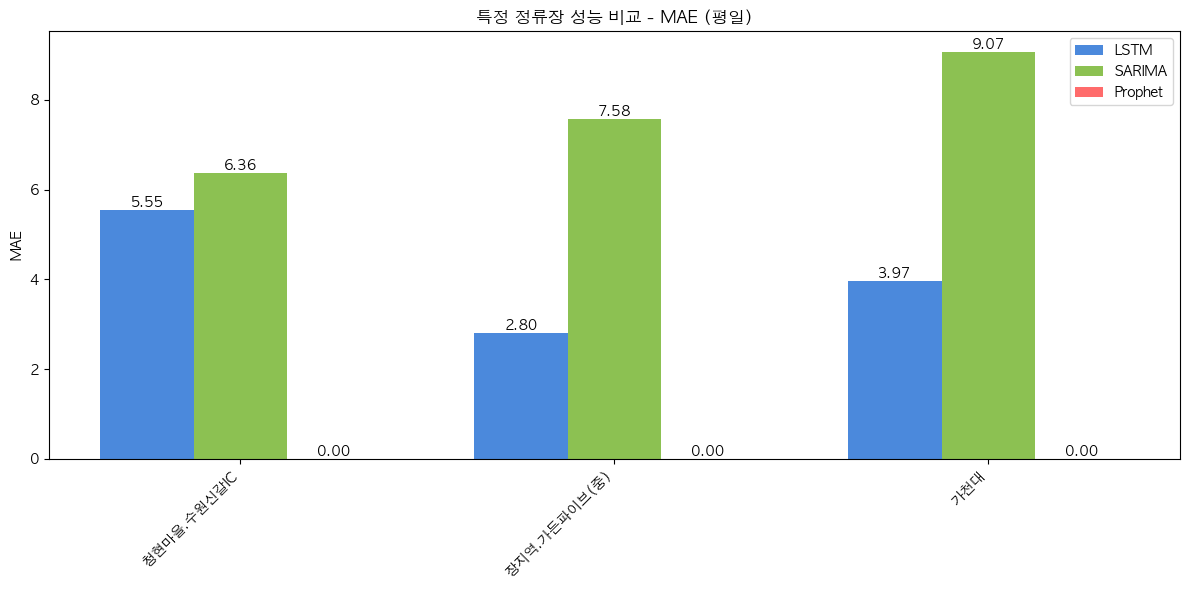

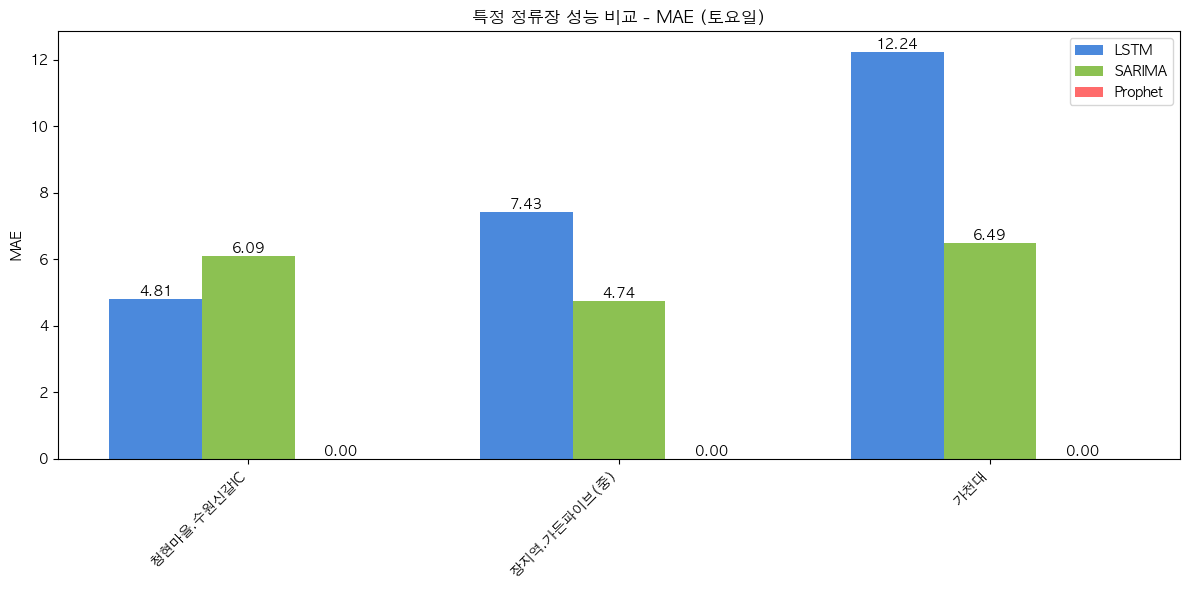

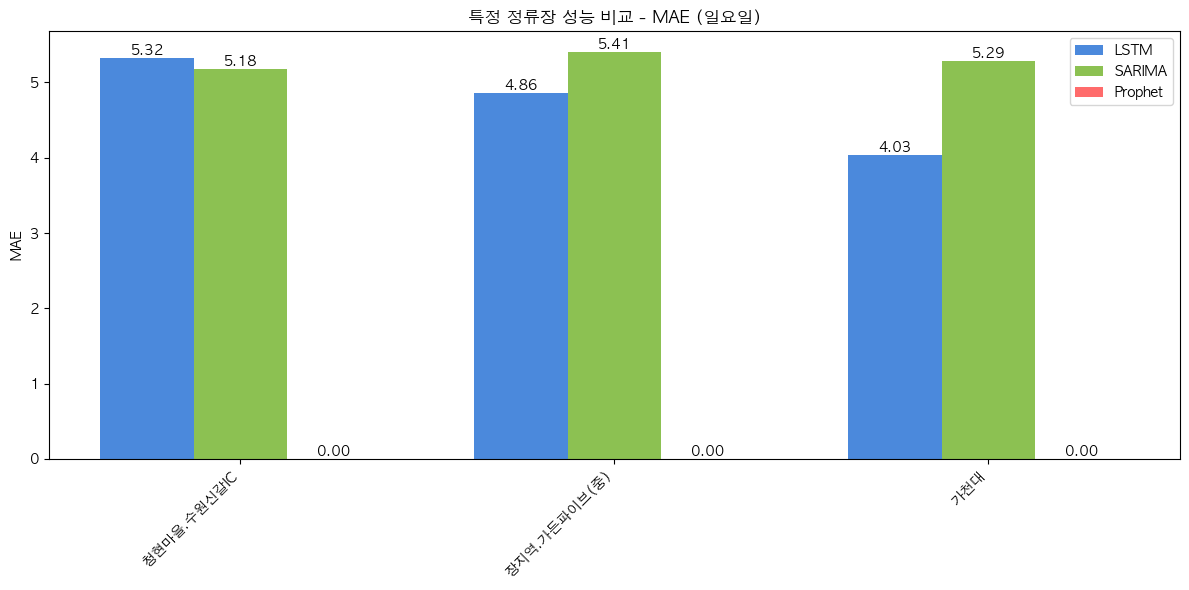

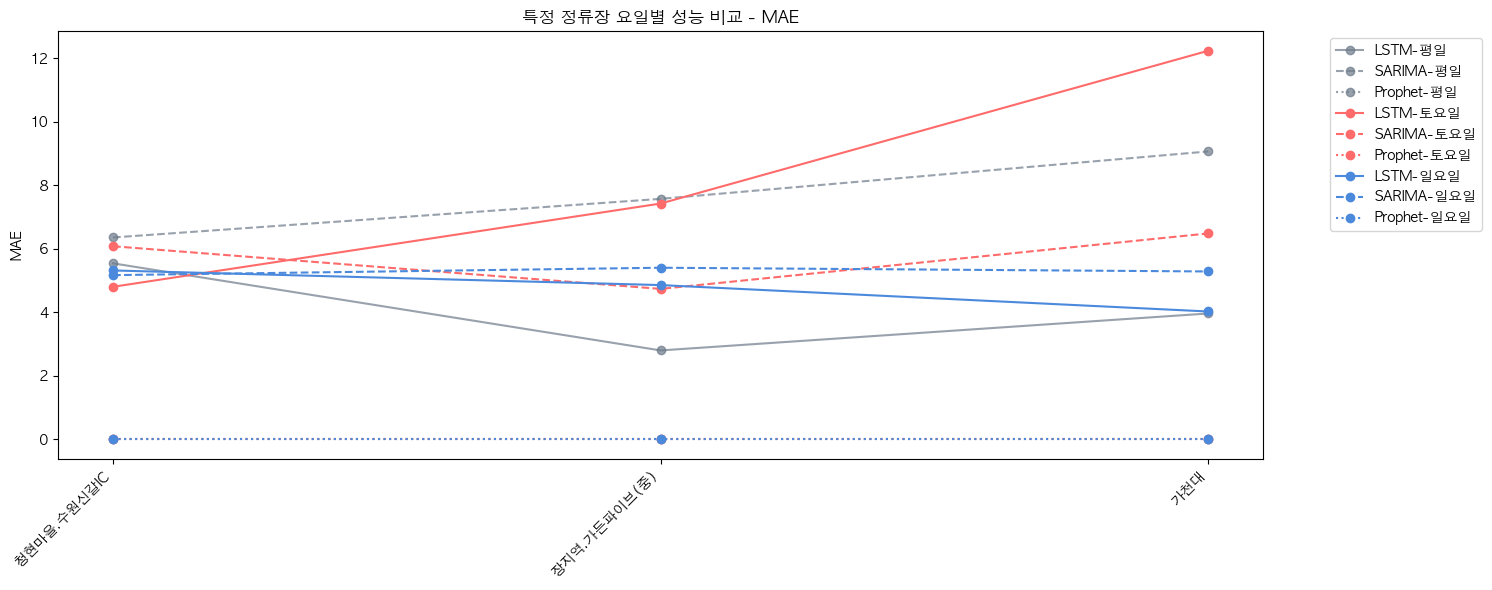


RMSE 점수:
model    요일구분  정류장명        
LSTM     일요일   가천대              6.531229
               장지역.가든파이브(중)     6.219262
               청현마을.수원신갈IC      6.882543
         토요일   가천대             13.526615
               장지역.가든파이브(중)     8.168218
               청현마을.수원신갈IC      5.813946
         평일    가천대              5.598448
               장지역.가든파이브(중)     4.384021
               청현마을.수원신갈IC      7.074598
Prophet  일요일   가천대              0.000000
               장지역.가든파이브(중)     0.000000
               청현마을.수원신갈IC      0.000000
         토요일   가천대              0.000000
               장지역.가든파이브(중)     0.000000
               청현마을.수원신갈IC      0.000000
         평일    가천대              0.000000
               장지역.가든파이브(중)     0.000000
               청현마을.수원신갈IC      0.000000
SARIMA   일요일   가천대              7.476499
               장지역.가든파이브(중)     6.692622
               청현마을.수원신갈IC      6.551409
         토요일   가천대              8.247323
               장지역.가든파이브(중)     6.099758
               청현마을

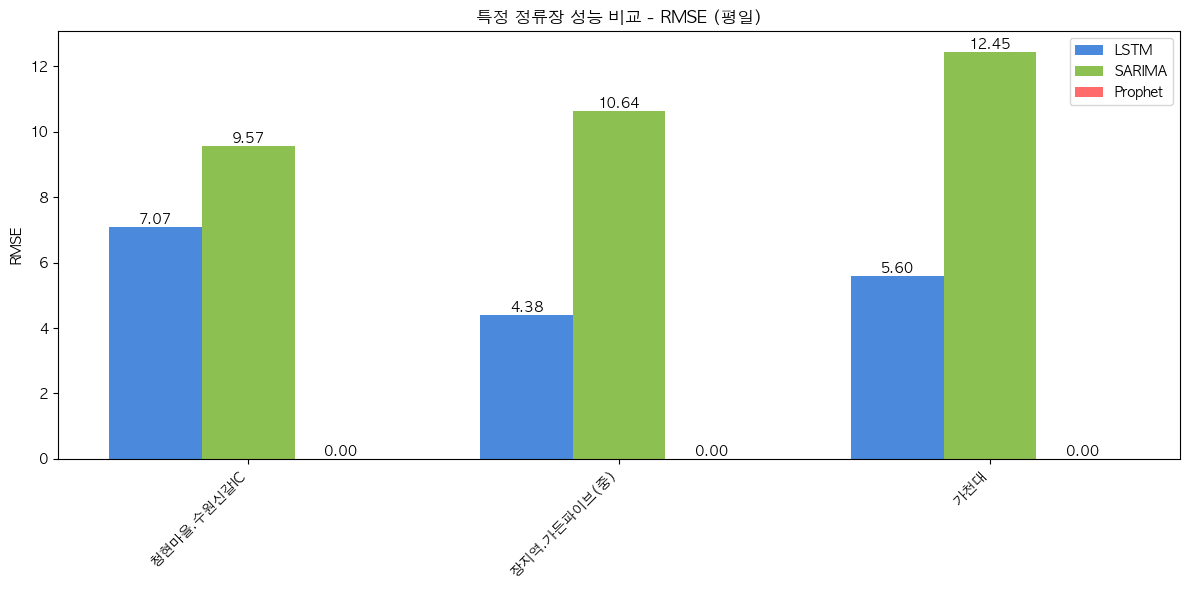

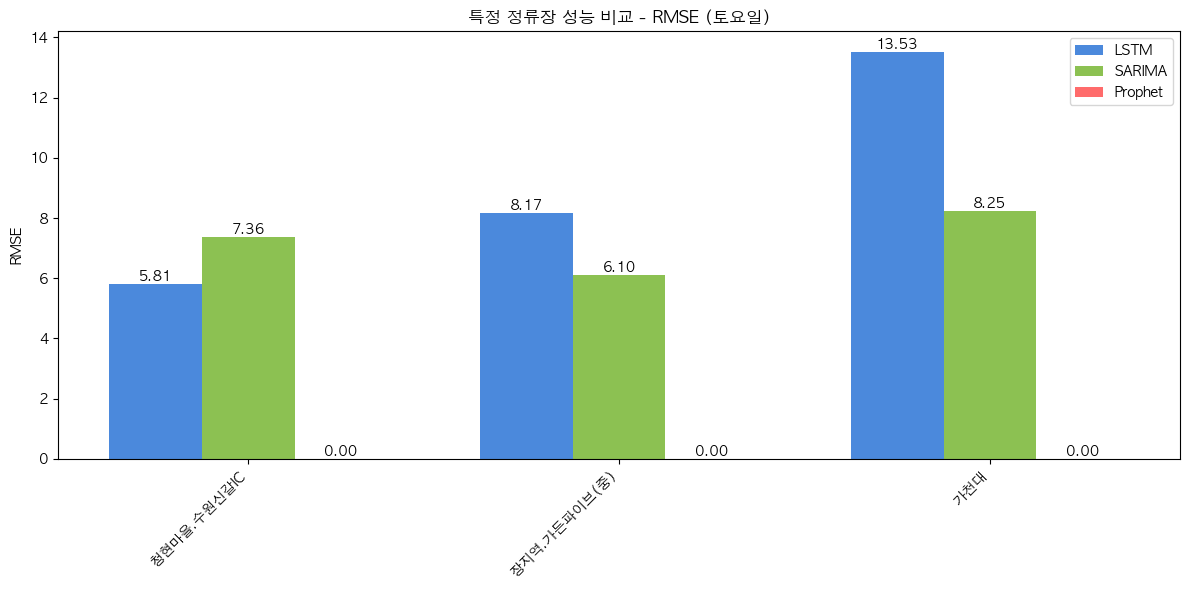

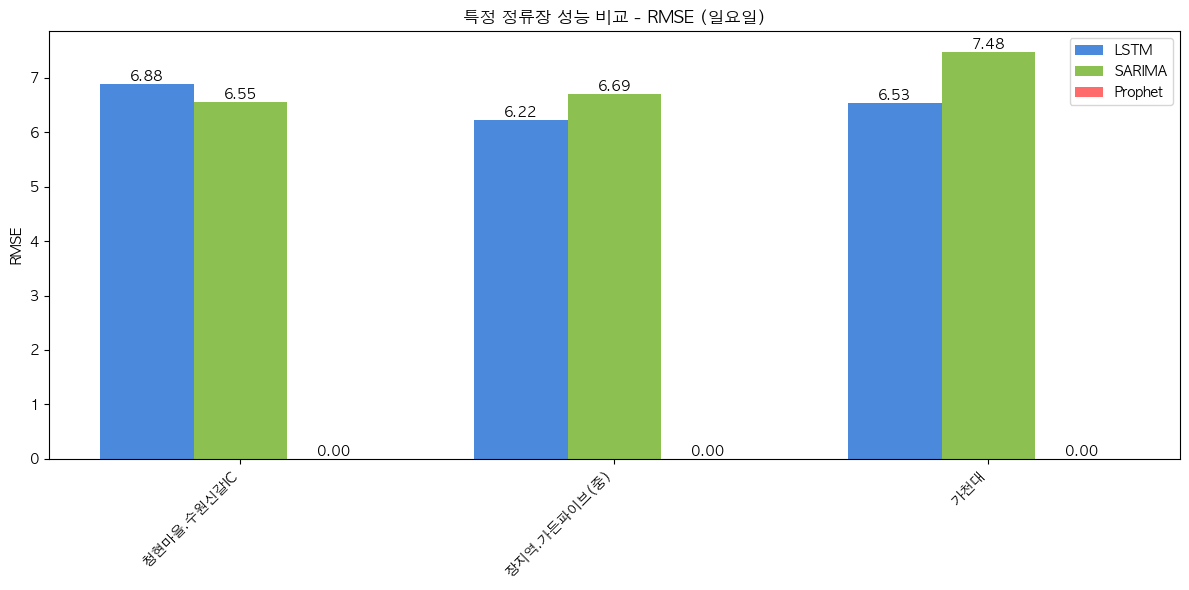

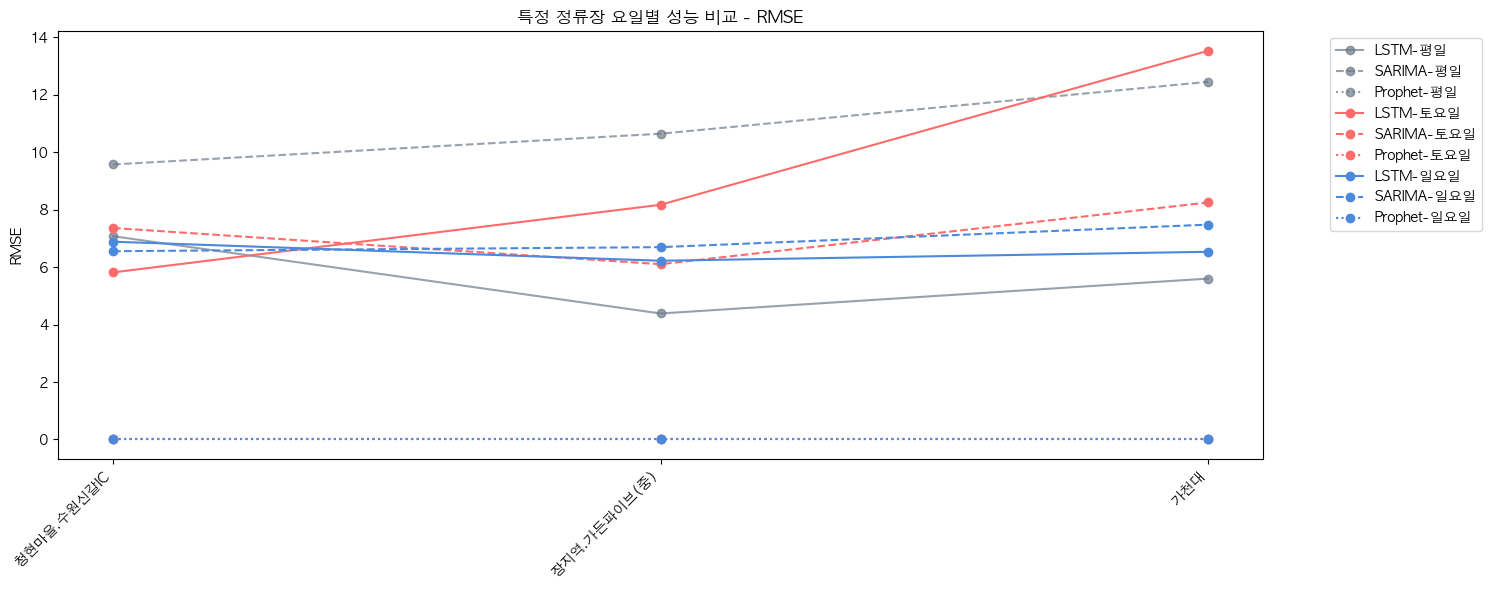


SMAPE 점수:
model    요일구분  정류장명        
LSTM     일요일   가천대              30.693385
               장지역.가든파이브(중)    117.546619
               청현마을.수원신갈IC      74.046499
         토요일   가천대             129.326586
               장지역.가든파이브(중)    114.079042
               청현마을.수원신갈IC      70.356726
         평일    가천대              75.357033
               장지역.가든파이브(중)     40.389278
               청현마을.수원신갈IC      68.115965
Prophet  일요일   가천대               0.000000
               장지역.가든파이브(중)      0.000000
               청현마을.수원신갈IC       0.000000
         토요일   가천대               0.000000
               장지역.가든파이브(중)      0.000000
               청현마을.수원신갈IC       0.000000
         평일    가천대               0.000000
               장지역.가든파이브(중)      0.000000
               청현마을.수원신갈IC       0.000000
SARIMA   일요일   가천대              51.909621
               장지역.가든파이브(중)     42.319589
               청현마을.수원신갈IC      29.663711
         토요일   가천대              44.706701
               장지역.가든파이브(중)     26.56

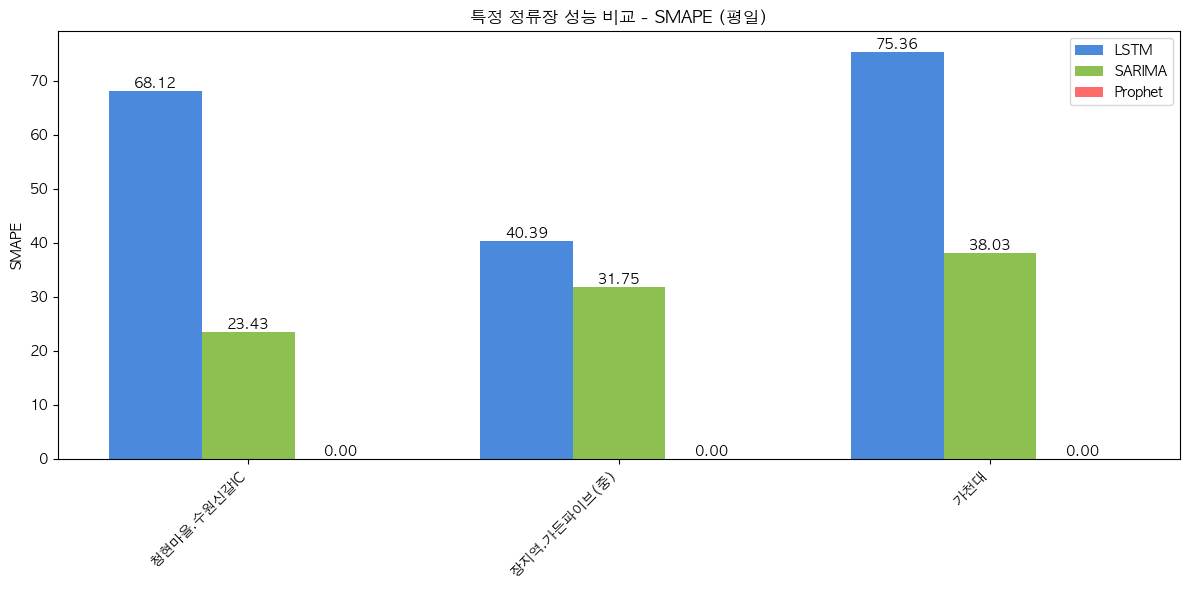

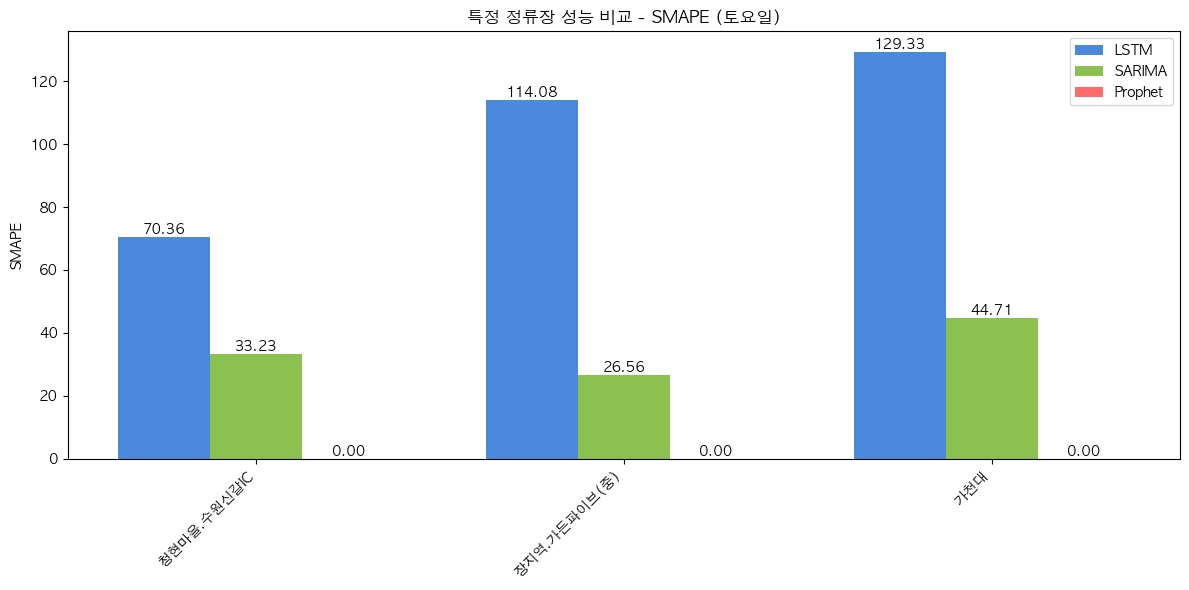

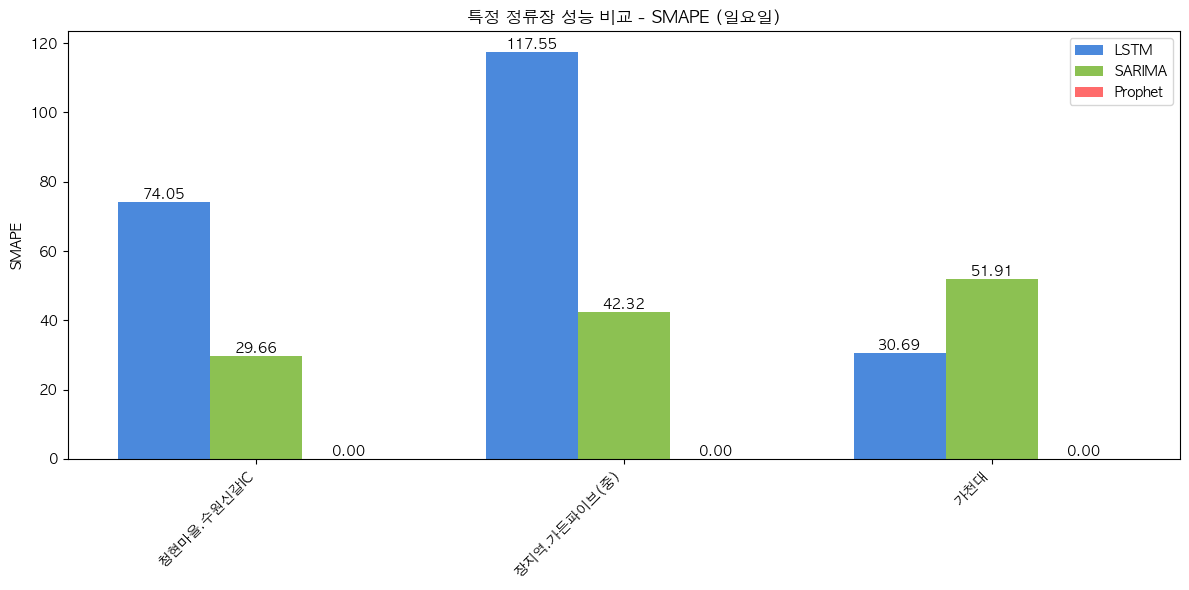

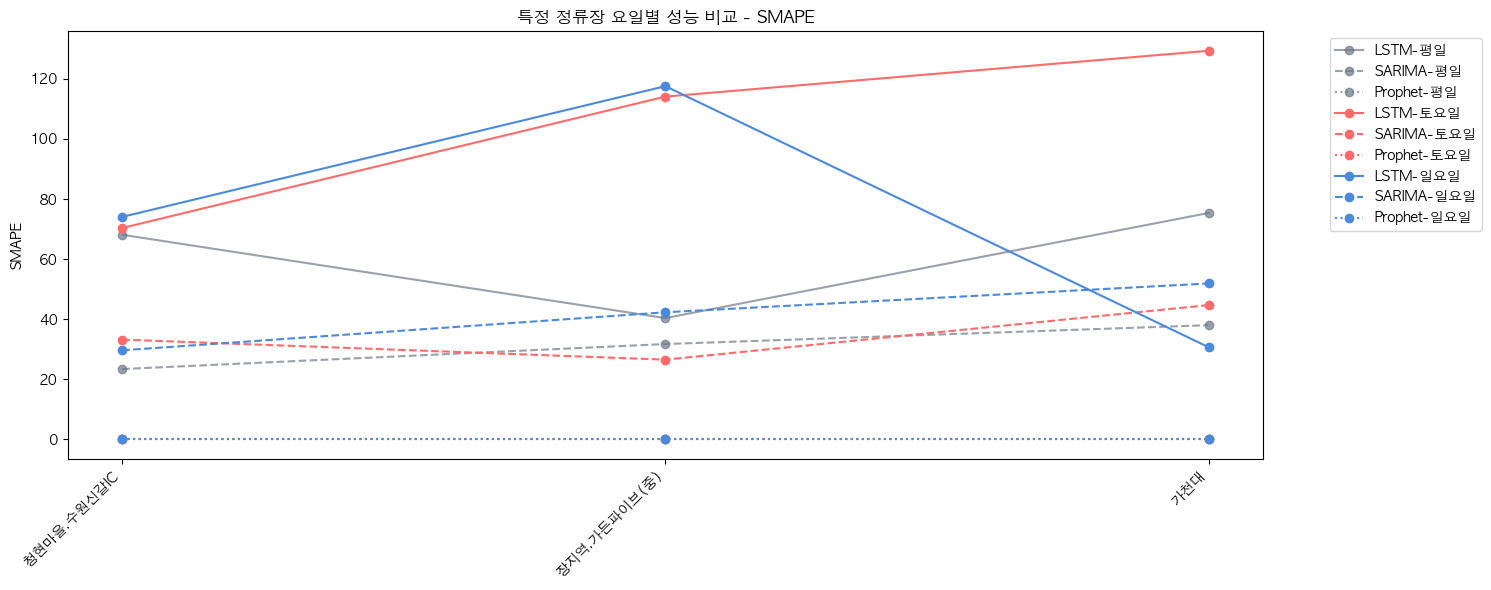

In [22]:
# 5번 블록: 특정 정류장 분석
# 분석하고 싶은 정류장 순번 리스트 - 여기만 수정하면 됩니다
target_stations = [36, 13, 35]

# 특정 정류장 데이터 필터링
station_data = all_models_df[all_models_df['정류장순번'].isin(target_stations)]

# 정류장 정보 출력
station_info = station_data[['정류장순번', '정류장명']].drop_duplicates()
print("\n=== 분석 대상 정류장 ===")
print(station_info)

# 첨두 시간대 데이터 분석
peak_data = station_data[station_data['구분'] == '첨두']
peak_results = peak_data.groupby(['model', '요일구분', '정류장명'])[metrics].mean()

# 결과 출력 및 시각화
print("\n=== 특정 정류장 분석 결과 ===")
for metric in metrics:
   print(f"\n{metric} 점수:")
   print(peak_results[metric])
   
   # 각 요일구분별 시각화
   for day_type in ['평일', '토요일', '일요일']:
       plt.figure(figsize=(12, 6))
       
       # 모델별 위치 계산
       stations = station_info['정류장명'].unique()
       x = np.arange(len(stations))
       width = 0.25
       
       # 각 모델별로 다른 색상의 막대 그래프 생성
       models = ['LSTM', 'SARIMA', 'Prophet']
       colors = ['#4B89DC', '#8CC152', '#FF6B6B']  # 파랑, 연두, 빨강
       
       for idx, (model, color) in enumerate(zip(models, colors)):
           data = [peak_results[metric].loc[model, day_type, station] for station in stations]
           bars = plt.bar(x + width*idx, data, width, label=model, color=color)
           
           # 막대 위에 수치 표시
           for bar in bars:
               height = bar.get_height()
               plt.text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.2f}',
                       ha='center', va='bottom')
       
       plt.title(f'특정 정류장 성능 비교 - {metric} ({day_type})')
       plt.ylabel(metric)
       plt.xticks(x + width, stations, rotation=45, ha='right')
       plt.legend()
       plt.grid(False)
       plt.tight_layout()
       plt.show()

   # 요일별 비교를 위한 추가 그래프
   plt.figure(figsize=(15, 6))
   
   # 모델별 위치 계산
   x = np.arange(len(stations))
   width = 0.25
   
   # 각 요일별로 다른 색상의 막대 그래프 생성
   day_types = ['평일', '토요일', '일요일']
   day_colors = ['#6C7A89', '#FF6B6B', '#4B89DC']  # 회색, 빨강, 파랑
   
   for idx, (day_type, color) in enumerate(zip(day_types, day_colors)):
       for model in models:
           data = [peak_results[metric].loc[model, day_type, station] for station in stations]
           plt.plot(stations, data, marker='o', label=f'{model}-{day_type}', 
                   color=color, alpha=0.7 if day_type=='평일' else 1.0,
                   linestyle='-' if model=='LSTM' else '--' if model=='SARIMA' else ':')
   
   plt.title(f'특정 정류장 요일별 성능 비교 - {metric}')
   plt.ylabel(metric)
   plt.xticks(rotation=45, ha='right')
   plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
   plt.grid(False)
   plt.tight_layout()
   plt.show()


=== 분석 대상 정류장 ===
     정류장순번          정류장명
78      13   청현마을.수원신갈IC
210     35  장지역.가든파이브(중)
216     36           가천대

=== 특정 정류장 첨두 시간대 분석 결과 ===

MAE 점수:
model    요일구분  정류장명        
LSTM     일요일   가천대              4.030484
               장지역.가든파이브(중)     4.862204
               청현마을.수원신갈IC      5.323018
         토요일   가천대             12.241529
               장지역.가든파이브(중)     7.430264
               청현마을.수원신갈IC      4.808176
         평일    가천대              3.967648
               장지역.가든파이브(중)     2.804225
               청현마을.수원신갈IC      5.546673
Prophet  일요일   가천대              0.000000
               장지역.가든파이브(중)     0.000000
               청현마을.수원신갈IC      0.000000
         토요일   가천대              0.000000
               장지역.가든파이브(중)     0.000000
               청현마을.수원신갈IC      0.000000
         평일    가천대              0.000000
               장지역.가든파이브(중)     0.000000
               청현마을.수원신갈IC      0.000000
SARIMA   일요일   가천대              5.291185
               장지역.가든파이브(중)     5.40

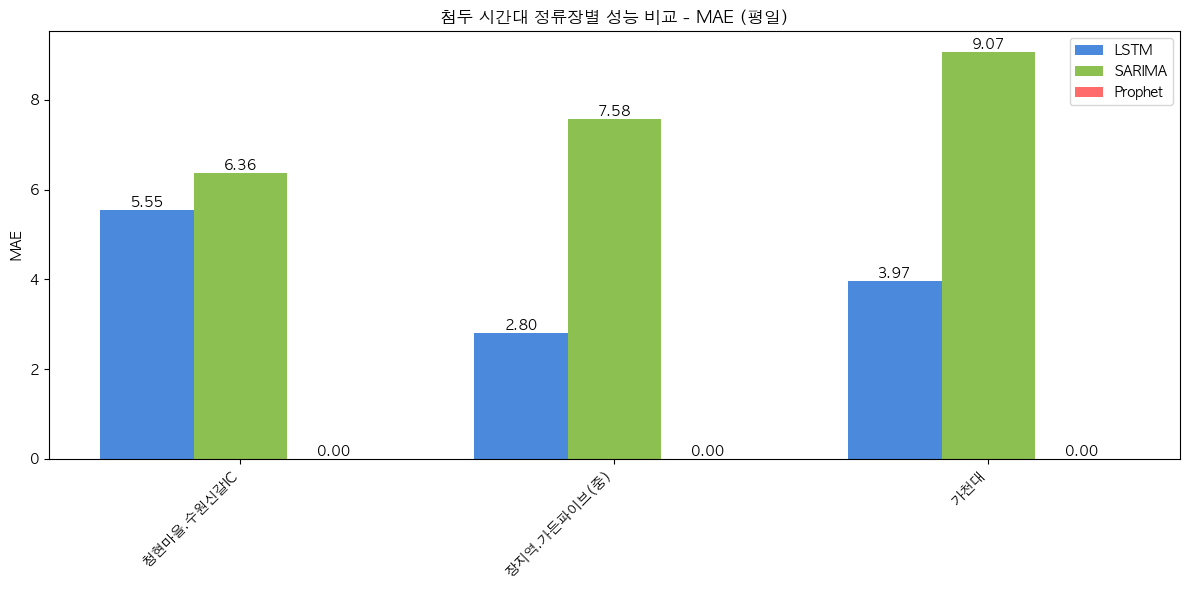

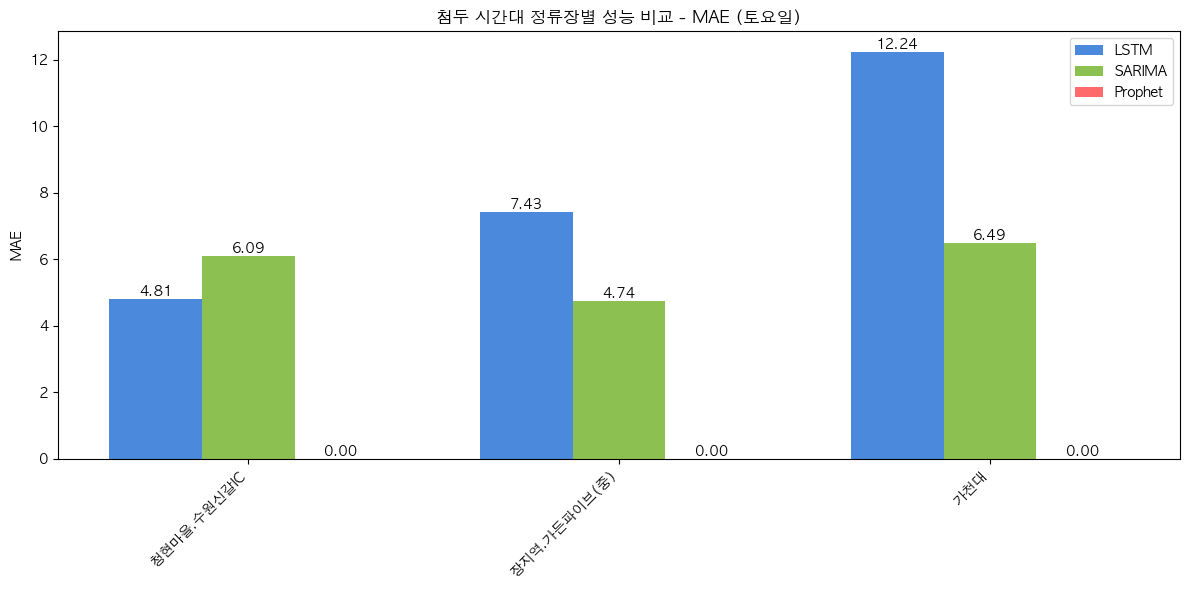

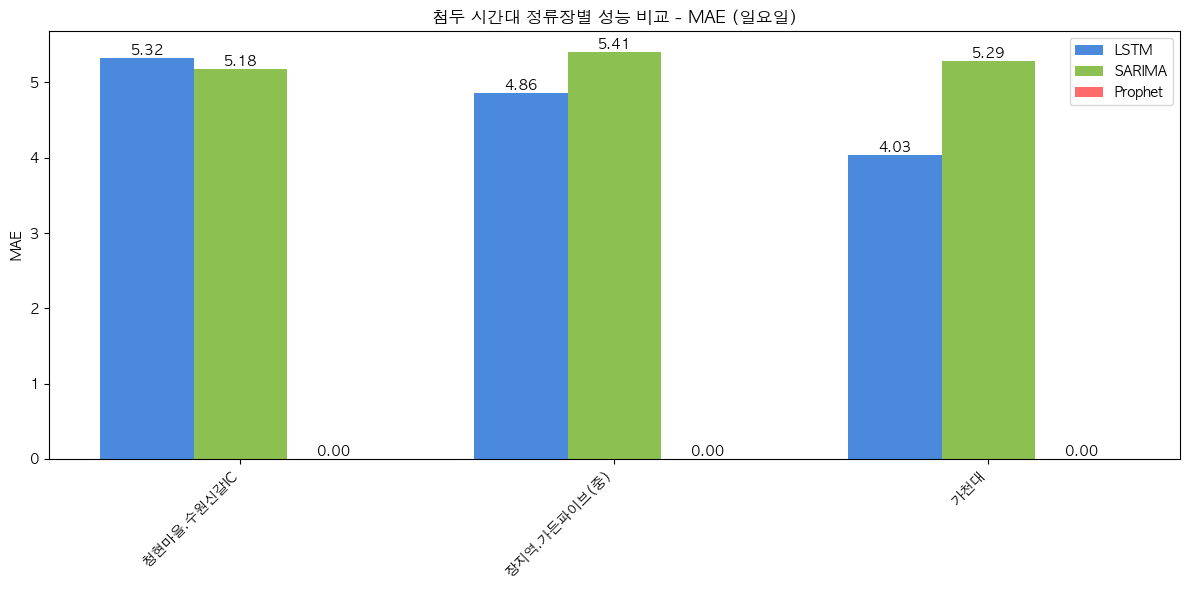


RMSE 점수:
model    요일구분  정류장명        
LSTM     일요일   가천대              6.531229
               장지역.가든파이브(중)     6.219262
               청현마을.수원신갈IC      6.882543
         토요일   가천대             13.526615
               장지역.가든파이브(중)     8.168218
               청현마을.수원신갈IC      5.813946
         평일    가천대              5.598448
               장지역.가든파이브(중)     4.384021
               청현마을.수원신갈IC      7.074598
Prophet  일요일   가천대              0.000000
               장지역.가든파이브(중)     0.000000
               청현마을.수원신갈IC      0.000000
         토요일   가천대              0.000000
               장지역.가든파이브(중)     0.000000
               청현마을.수원신갈IC      0.000000
         평일    가천대              0.000000
               장지역.가든파이브(중)     0.000000
               청현마을.수원신갈IC      0.000000
SARIMA   일요일   가천대              7.476499
               장지역.가든파이브(중)     6.692622
               청현마을.수원신갈IC      6.551409
         토요일   가천대              8.247323
               장지역.가든파이브(중)     6.099758
               청현마을

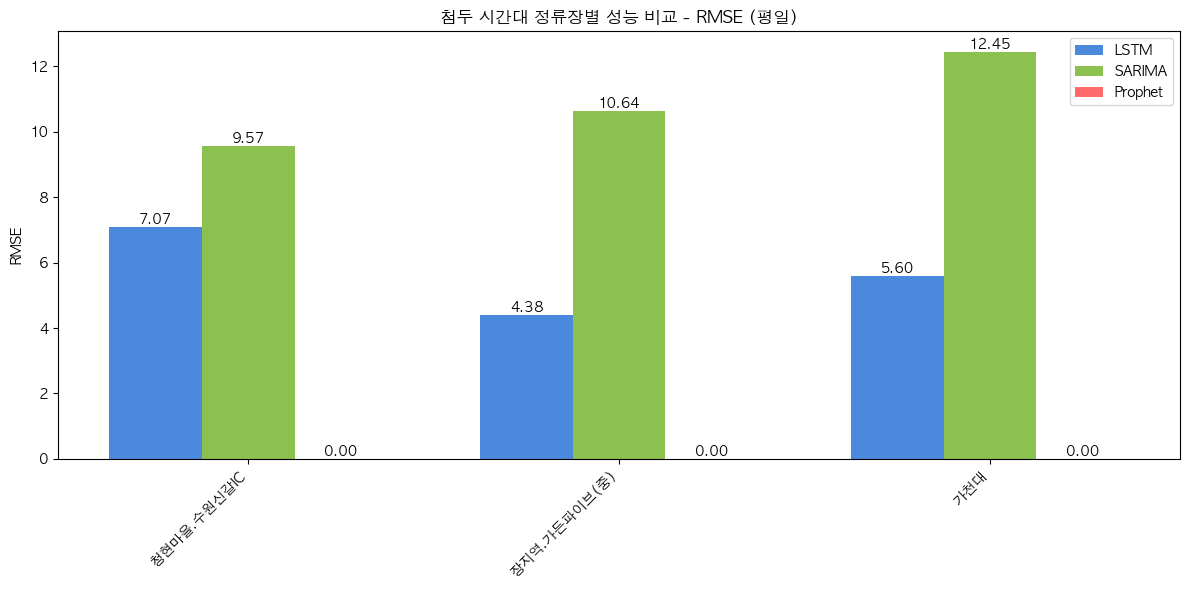

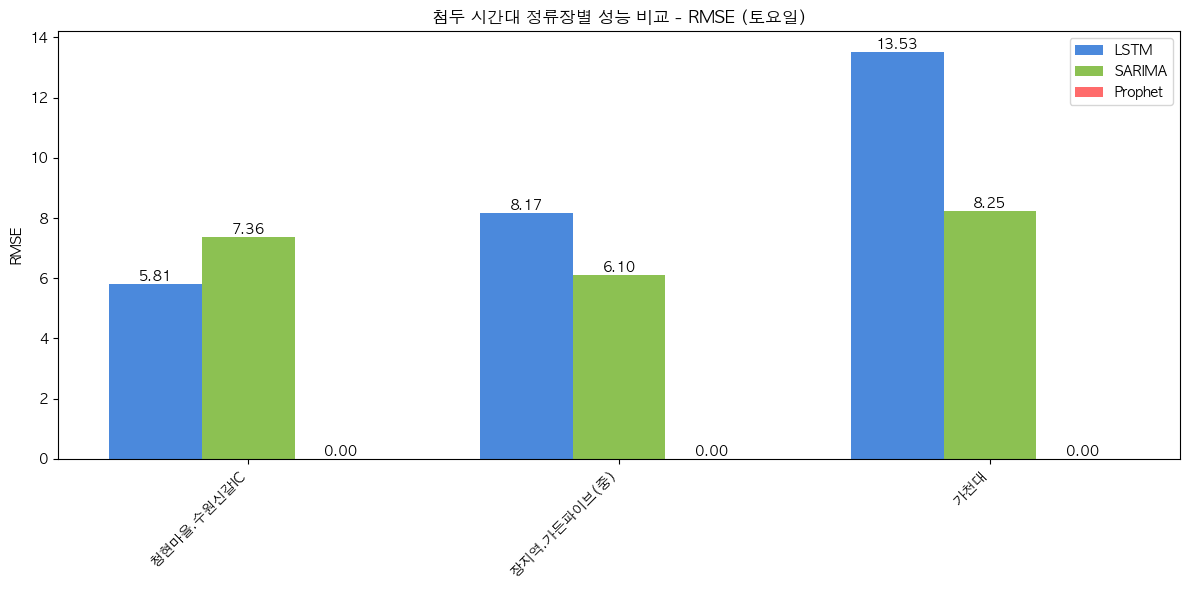

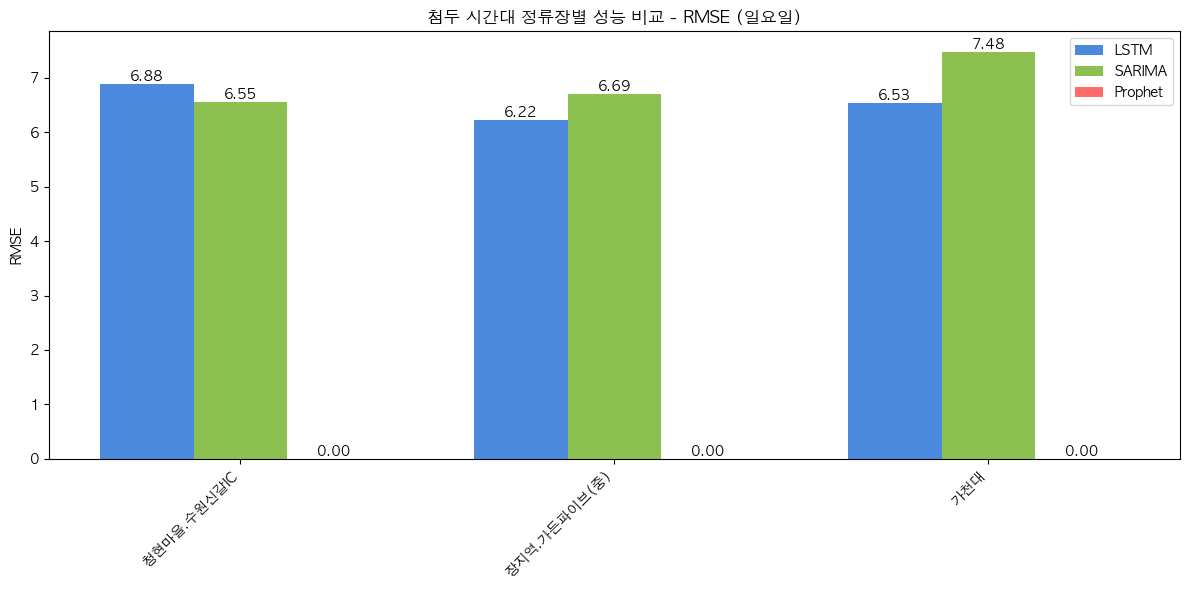


SMAPE 점수:
model    요일구분  정류장명        
LSTM     일요일   가천대              30.693385
               장지역.가든파이브(중)    117.546619
               청현마을.수원신갈IC      74.046499
         토요일   가천대             129.326586
               장지역.가든파이브(중)    114.079042
               청현마을.수원신갈IC      70.356726
         평일    가천대              75.357033
               장지역.가든파이브(중)     40.389278
               청현마을.수원신갈IC      68.115965
Prophet  일요일   가천대               0.000000
               장지역.가든파이브(중)      0.000000
               청현마을.수원신갈IC       0.000000
         토요일   가천대               0.000000
               장지역.가든파이브(중)      0.000000
               청현마을.수원신갈IC       0.000000
         평일    가천대               0.000000
               장지역.가든파이브(중)      0.000000
               청현마을.수원신갈IC       0.000000
SARIMA   일요일   가천대              51.909621
               장지역.가든파이브(중)     42.319589
               청현마을.수원신갈IC      29.663711
         토요일   가천대              44.706701
               장지역.가든파이브(중)     26.56

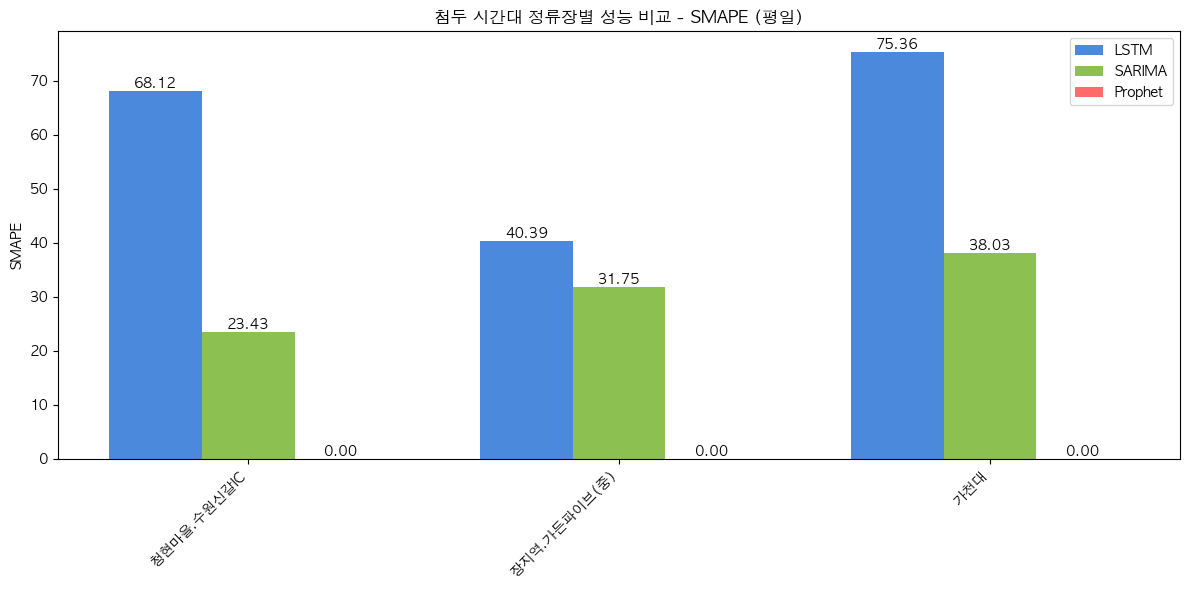

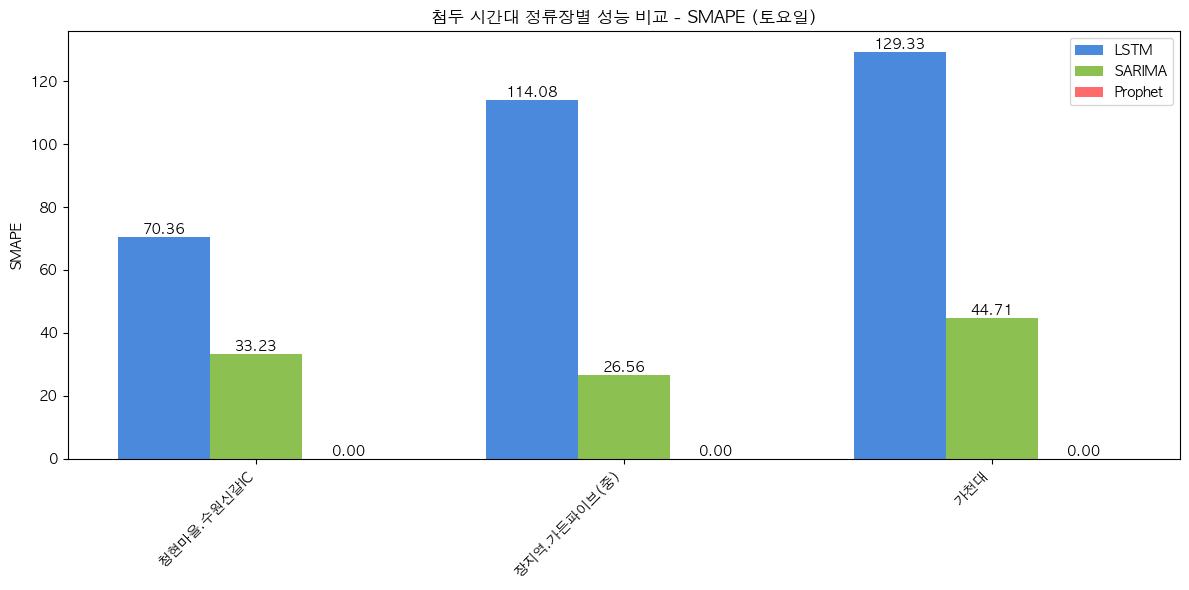

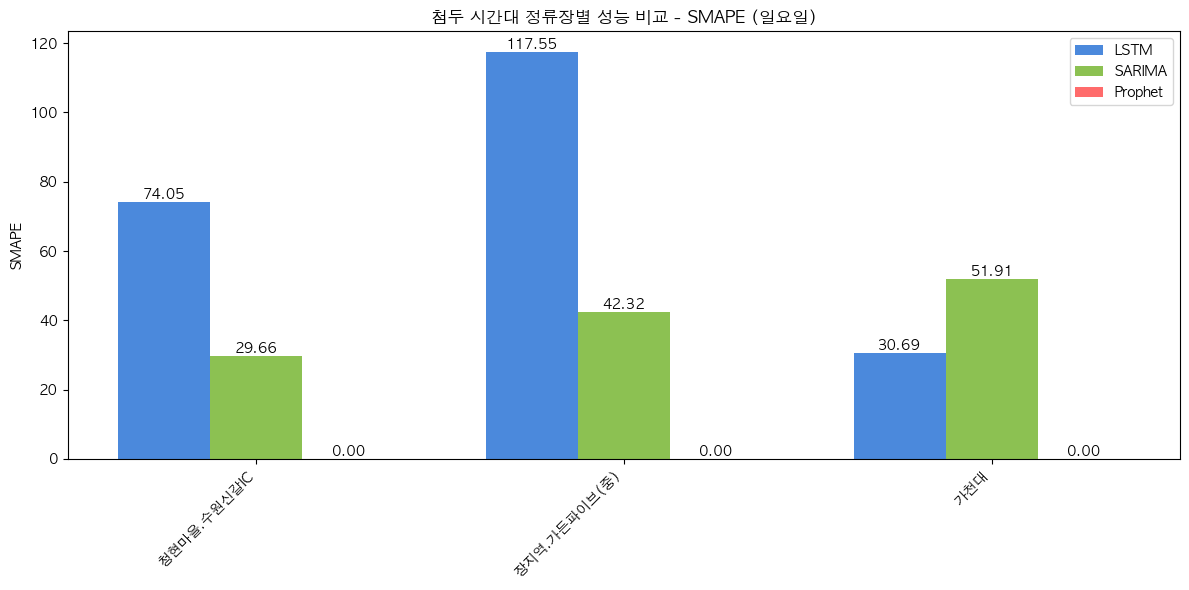

In [23]:
# 특정 정류장의 첨두 시간대 분석
# 분석하고 싶은 정류장 순번 리스트
target_stations = [36, 13, 35]

# 특정 정류장 데이터 필터링
station_data = all_models_df[all_models_df['정류장순번'].isin(target_stations)]

# 정류장 정보 출력
station_info = station_data[['정류장순번', '정류장명']].drop_duplicates()
print("\n=== 분석 대상 정류장 ===")
print(station_info)

# 첨두 시간대 데이터만 필터링
peak_data = station_data[station_data['구분'] == '첨두']
peak_results = peak_data.groupby(['model', '요일구분', '정류장명'])[metrics].mean()

# 결과 출력 및 시각화
print("\n=== 특정 정류장 첨두 시간대 분석 결과 ===")
for metric in metrics:
    print(f"\n{metric} 점수:")
    print(peak_results[metric])
    
    # 각 요일구분별 시각화
    for day_type in ['평일', '토요일', '일요일']:
        plt.figure(figsize=(12, 6))
        
        # 모델별 위치 계산
        stations = station_info['정류장명'].unique()
        x = np.arange(len(stations))
        width = 0.25
        
        # 각 모델별로 다른 색상의 막대 그래프 생성
        models = ['LSTM', 'SARIMA', 'Prophet']
        colors = ['#4B89DC', '#8CC152', '#FF6B6B']  # 파랑, 연두, 빨강
        
        for idx, (model, color) in enumerate(zip(models, colors)):
            data = [peak_results[metric].loc[model, day_type, station] for station in stations]
            bars = plt.bar(x + width*idx, data, width, label=model, color=color)
            
            # 막대 위에 수치 표시
            for bar in bars:
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.2f}',
                        ha='center', va='bottom')
        
        plt.title(f'첨두 시간대 정류장별 성능 비교 - {metric} ({day_type})')
        plt.ylabel(metric)
        plt.xticks(x + width, stations, rotation=45, ha='right')
        plt.legend()
        plt.grid(False)
        plt.tight_layout()
        plt.show()

In [12]:
### 임시 prophet 평가 데이터 0으로 채우기

import pandas as pd

# 파일 경로
file_path = '/Users/foxrainswap/Desktop/캡스톤_코드/1112/SARIMA_결과/sarima_evaluation.csv'

# SARIMA 평가 파일 불러오기
sarima_df = pd.read_csv(file_path)

# 모든 수치형 열(MAE, RMSE, MAPE, SMAPE)의 값을 0으로 변경
numeric_columns = ['MAE', 'RMSE', 'MAPE', 'SMAPE']
sarima_df[numeric_columns] = 0

# 새로운 파일 이름 생성 및 저장
new_file_path = '/Users/foxrainswap/Desktop/캡스톤_코드/1112/SARIMA_결과/sarima_evaluation_zero.csv'
sarima_df.to_csv(new_file_path, index=False)

print("파일이 성공적으로 저장되었습니다.")
print(f"저장된 파일 경로: {new_file_path}")

# 확인을 위해 첫 몇 행 출력
print("\n변환된 데이터 확인:")
print(sarima_df.head())

파일이 성공적으로 저장되었습니다.
저장된 파일 경로: /Users/foxrainswap/Desktop/캡스톤_코드/1112/SARIMA_결과/sarima_evaluation_zero.csv

변환된 데이터 확인:
   정류장순번    정류장명 요일구분  구분  MAE  RMSE  MAPE  SMAPE
0      0  경희대차고지   평일  전체    0     0     0      0
1      0  경희대차고지   평일  첨두    0     0     0      0
2      0  경희대차고지  토요일  전체    0     0     0      0
3      0  경희대차고지  토요일  첨두    0     0     0      0
4      0  경희대차고지  일요일  전체    0     0     0      0
